<a href="https://colab.research.google.com/github/Krishna270704/CodeAlpha_EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

Step 2: Load Dataset

In [ ]:
# Upload matches.csv manually in Colab first
from google.colab import files
uploaded = files.upload()

# Load data
df = pd.read_csv('matches.csv')
df.head()


Saving matches.csv to matches (2).csv


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Step 3: Basic Info

In [ ]:
# Shape and structure
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()
df.describe()


Shape: (756, 18)
Columns: Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      7

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


Step 4: Data Cleaning

In [ ]:
# Check for nulls
df.isnull().sum()

# Drop columns not needed for analysis (optional)
df = df.drop(['umpire1', 'umpire2', 'umpire3'], axis=1)


 Step 5: EDA Insights

Total Matches per Season

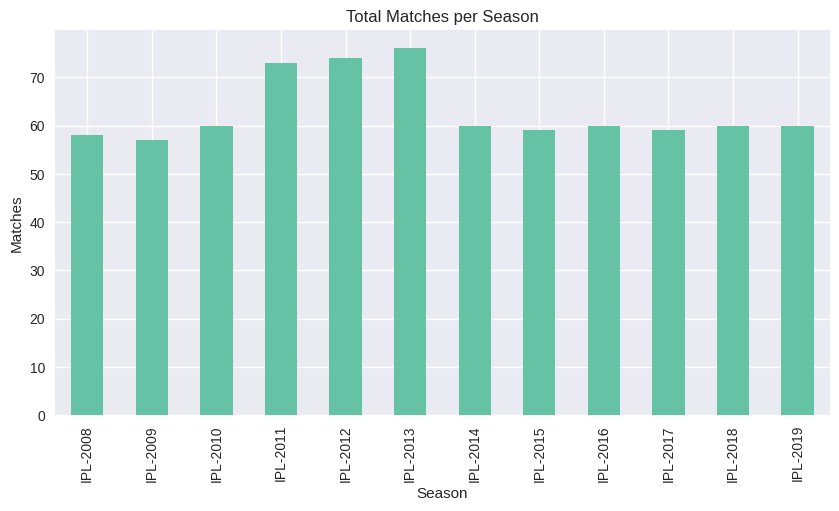

In [ ]:
season_wise = df['Season'].value_counts().sort_index()
season_wise.plot(kind='bar', figsize=(10,5), title="Total Matches per Season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

Most Successful Teams

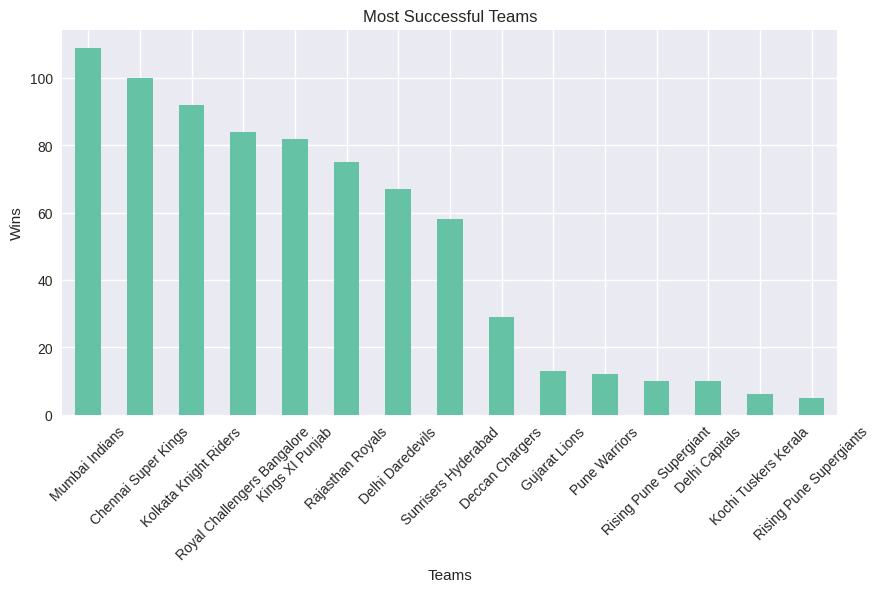

In [ ]:
df['winner'].value_counts().plot(kind='bar', figsize=(10,5), title="Most Successful Teams")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.show()


Matches per Venue

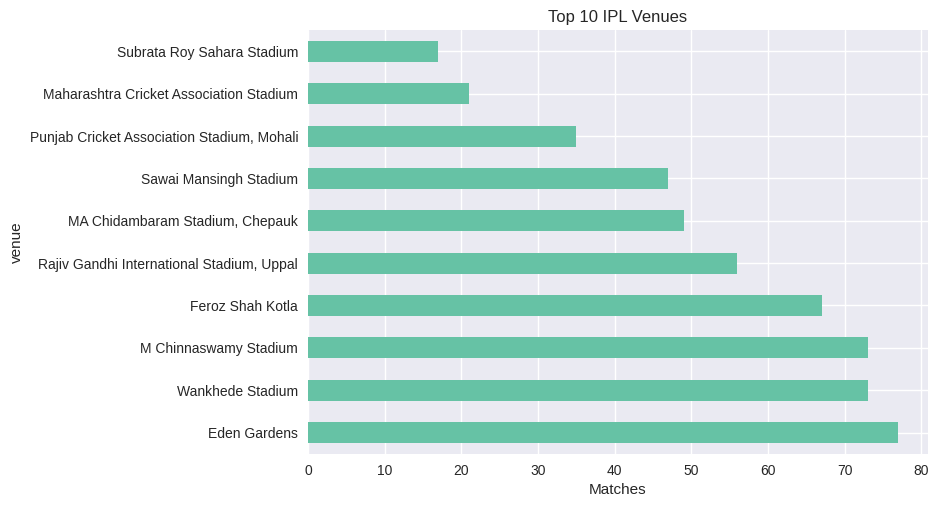

In [ ]:
df['venue'].value_counts().head(10).plot(kind='barh', title="Top 10 IPL Venues")
plt.xlabel("Matches")
plt.show()


Toss Winner vs Match Winner

In [ ]:
toss_match = np.sum(df['toss_winner'] == df['winner'])
print("Matches where toss winner also won the match:", toss_match)
print("Percentage:", round((toss_match / len(df)) * 100, 2), "%")


Matches where toss winner also won the match: 393
Percentage: 51.98 %


# Insights:
- Number of matches increased till 2013, then stable
- Mumbai Indians are most successful
- Eden Gardens & Wankhede are most used venues
- Toss winning helps ~51-55% of the time